Formula: P(class|data) = (P(data|class) * P(class)) / P(data)

P(class|data) is the probability of class given the provided data.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/My Drive/ML Datasets/diabetes.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dataset.keys()

Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')

# Exploring the Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [ ]:
dataset.shape

(995, 3)

In [ ]:
print(dataset[0:5])

   glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1


In [ ]:
dataset.columns

Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')

# Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set, we train on 80% data and test on the remaining 20%
X=dataset.drop(axis=1,labels="diabetes")
y=dataset.diabetes.values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1) 
print(X_train.shape,y_train.shape)

(796, 2) (796,)


# Model Generation

We will use the Gaussian Naive Bayes model on the dataset

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Model Analysis

In [ ]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Accuracy
Tells us how good/bad the prediction is based on a scale from 0 to 1

$Accuray = \dfrac{TP+ TN}{TP+TN +FP+FN}$

TP: True Positive i.e predicted same as actual and is the correct class (presence)

TN: True Negative (i.e predicted same as actual and is the correct class (absence)

FP: False Positive (actual is negative but presence of class is predicted)

FN: False Negative (actually presence of class but not predicted)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9396984924623115


# Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. Basically it gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[97,  3],
       [ 9, 90]])

[[97  3  0]
 [ 9 90  0]
 [ 0  0  0]]


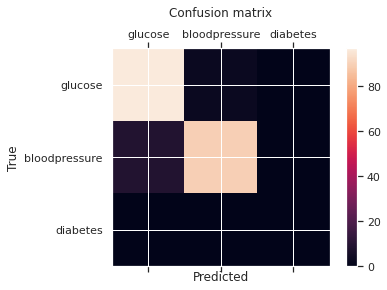

In [ ]:
label_code = [0,1,2]
label_name = ['glucose','bloodpressure','diabetes'] 
label_map = {0:'glucose',1:'bloodpressure',2:'diabetes'}
y_test = [label_map[code] for code in y_test]
y_pred = [label_map[code] for code in y_pred]
cm = confusion_matrix(y_test, y_pred, label_name)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + label_name)
ax.set_yticklabels([''] + label_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Recall
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (a small number of FN).

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
print(recall)

[0.97       0.90909091]


# Precision
Ratio of total number of correctly classified positive examples to the total number of predicted positive examples.

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None)
print(precision)

[0.91509434 0.96774194]


#F-Score
F-measure is Harmonic Mean of precision and recall.
The F-Measure will always be nearer to the smaller value of Precision or Recal

$F1Score = \dfrac{2*recall*precision}{Recall+Precision}$

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

[0.94174757 0.9375    ]
